### Dataset Description:

- employee_id : Unique ID for employee
- department : Department of employee
- region : Region of employment (unordered)
- education : Education Level
- gender : Gender of Employee
- recruitment_channel : Channel of recruitment for employee
- no_of_trainings : no of other trainings completed in previous year on soft skills, technical skills etc.
- age : Age of Employee
- previous_year_rating : Employee Rating for the previous year
- length_of_service : Length of service in years
- KPIs_met >80% : if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
- awards_won? : if awards won during previous year then 1 else 0
- avg_training_score : Average score in current training evaluations
- is_promoted : (Target) Recommended for promotion

### Importing Basic libraries:

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [31]:
# loading training data and reading top 5 records

df = pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [32]:
### Reading bottom 5 records

df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [33]:
print("There are {} rows and {} columns in the training dataset.".format(df.shape[0],df.shape[1]))

There are 54808 rows and 14 columns in the training dataset.


### Exploratory Data Analysis:

In [34]:
# To know the datatypes of the column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [35]:
print("There are {} duplicate records.".format(df.shape[0] - len(df['employee_id'].unique())))

There are 0 duplicate records.


In [36]:
# Droping employee_id column as it doesnot provide any information

df.drop('employee_id',axis=1,inplace=True)

In [37]:
# Name of the columns

print("Column Names: {}".format(list(df.columns)))

Column Names: ['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [38]:
# Column names into list

col_name = df.columns.to_list()

In [39]:
# To find out number of unique values and unique vales of a perticular column

for i in col_name:
    print("In the column - {}:".format(i))
    print("There are {0} Unique values".format(len(df[i].unique())))
    print("Unique vales in the column are - \n{}".format(list(df[i].unique())))
    print("")

In the column - department:
There are 9 Unique values
Unique vales in the column are - 
['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']

In the column - region:
There are 34 Unique values
Unique vales in the column are - 
['region_7', 'region_22', 'region_19', 'region_23', 'region_26', 'region_2', 'region_20', 'region_34', 'region_1', 'region_4', 'region_29', 'region_31', 'region_15', 'region_14', 'region_11', 'region_5', 'region_28', 'region_17', 'region_13', 'region_16', 'region_25', 'region_10', 'region_27', 'region_30', 'region_12', 'region_21', 'region_8', 'region_32', 'region_6', 'region_33', 'region_24', 'region_3', 'region_9', 'region_18']

In the column - education:
There are 4 Unique values
Unique vales in the column are - 
["Master's & above", "Bachelor's", nan, 'Below Secondary']

In the column - gender:
There are 2 Unique values
Unique vales in the column are - 
['f', 'm']

In the column - recruitment_channel:


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


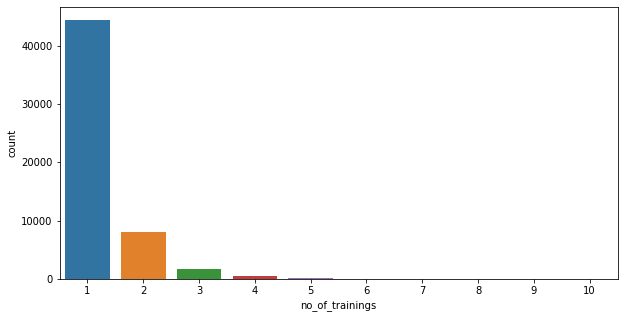

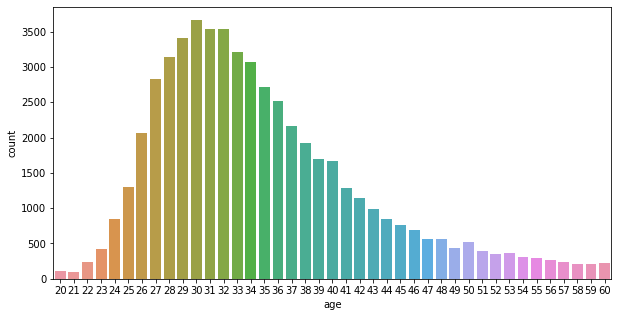

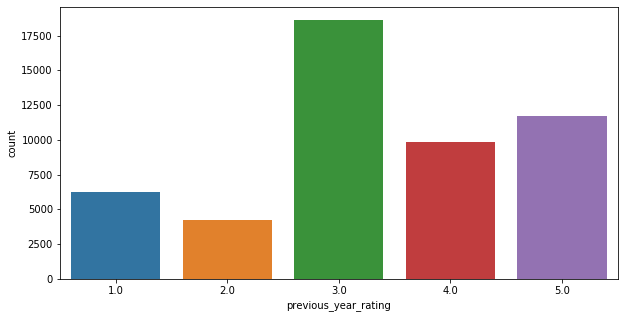

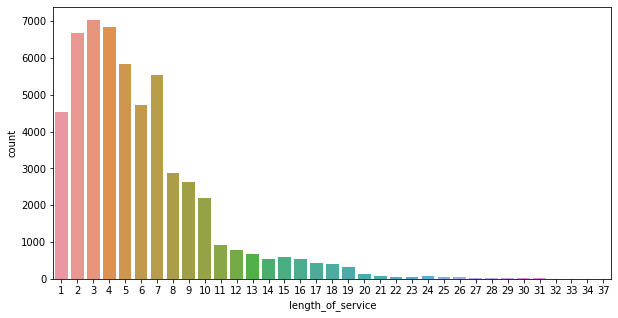

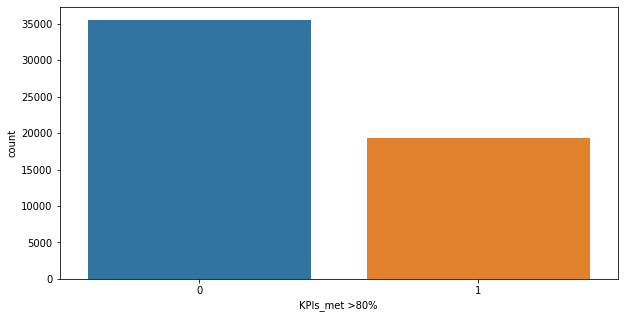

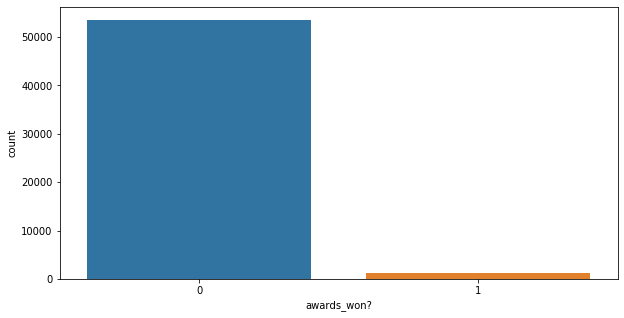

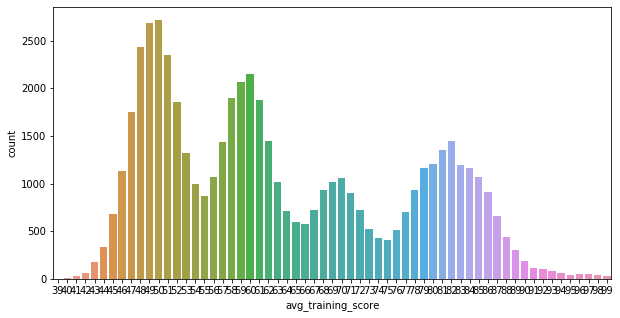

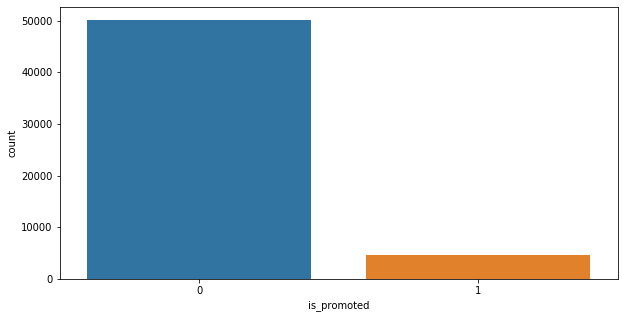

In [41]:
for i in [ 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.show()

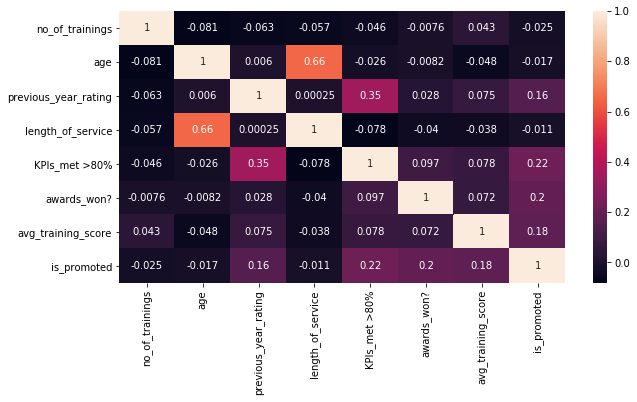

In [42]:
# Correlation Matrix

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

- 'length_of_service' is highly correlated with 'age'
- 'KPIs_met >80%' is slightly correlated with 'previous_year_rating'

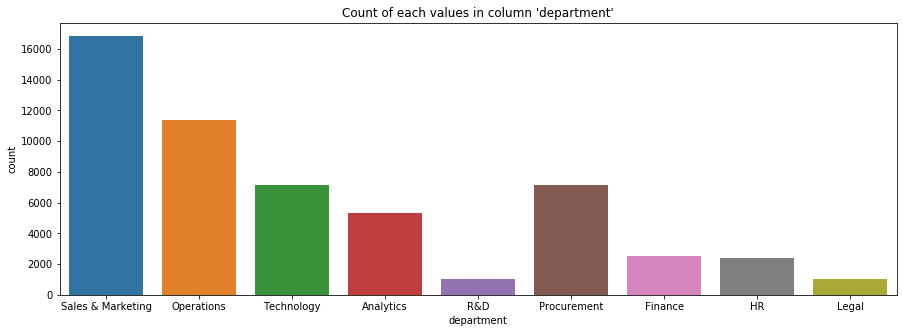

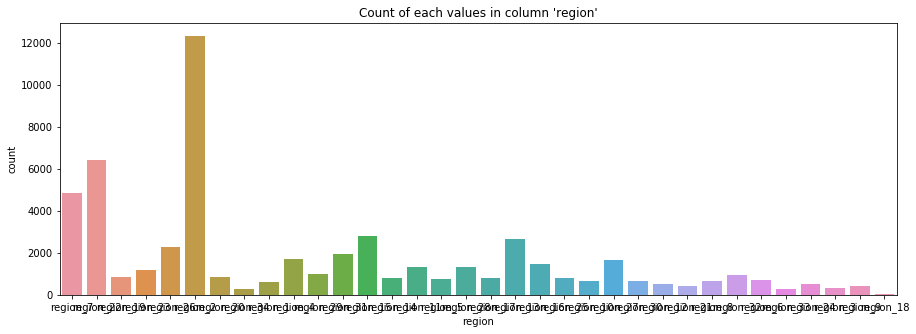

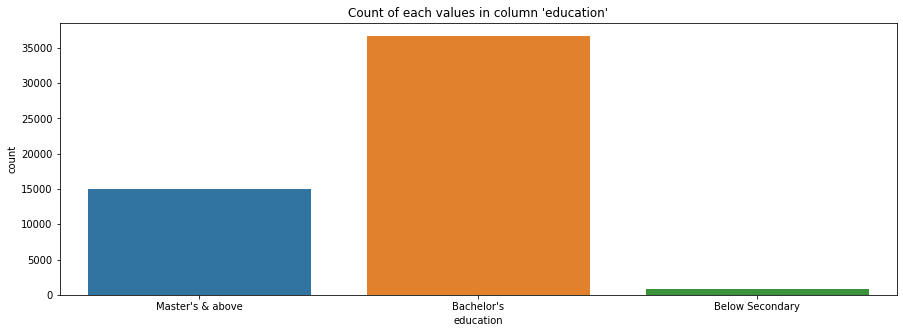

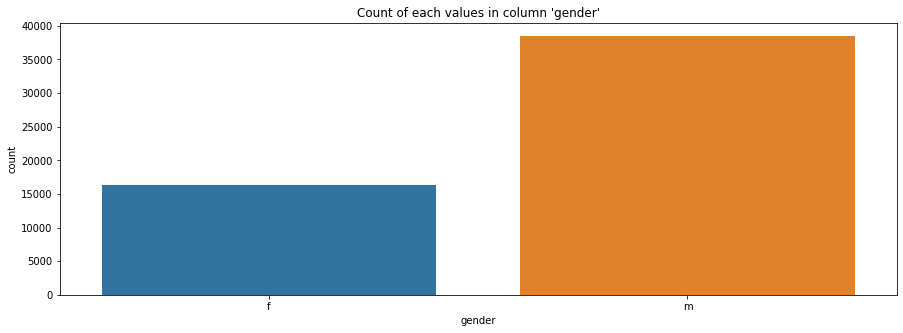

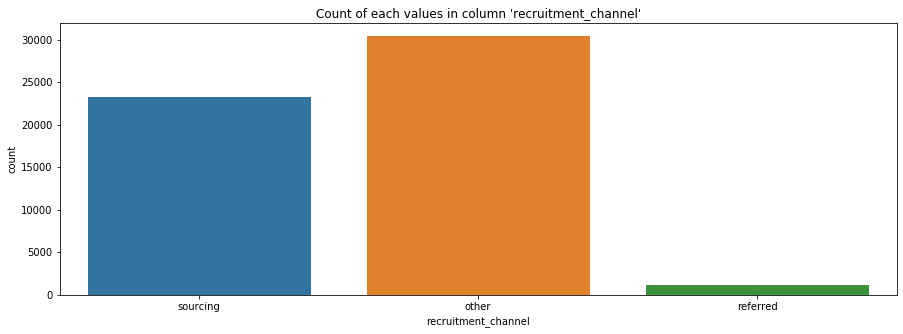

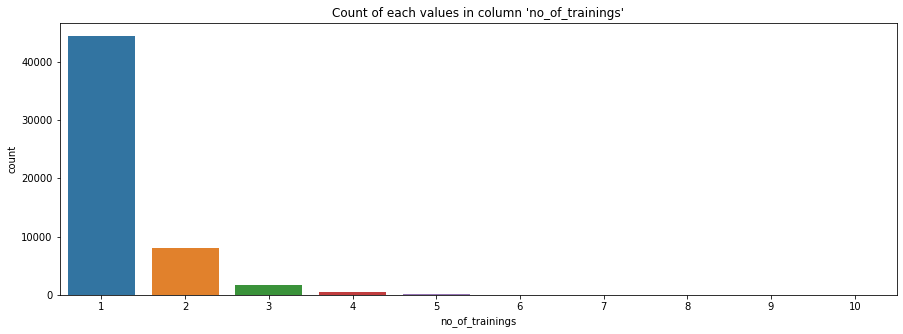

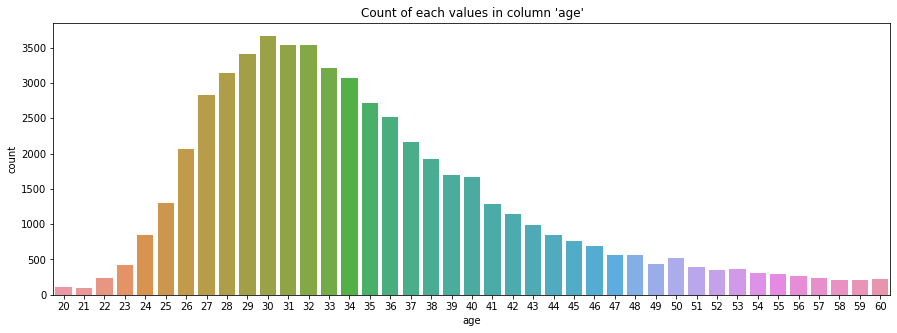

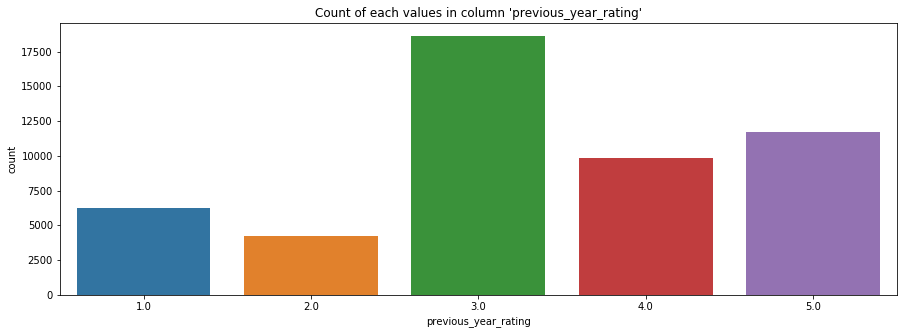

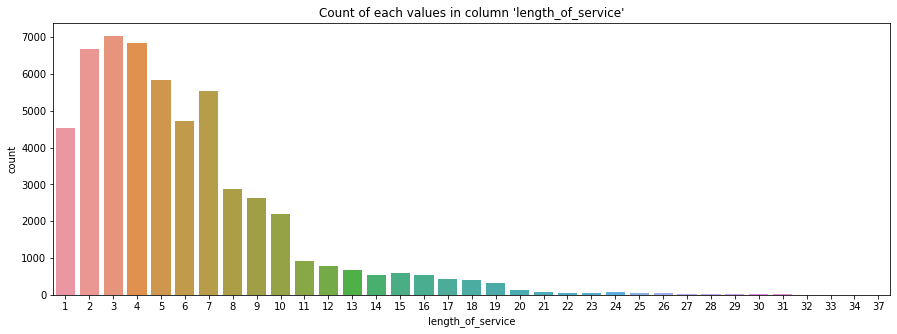

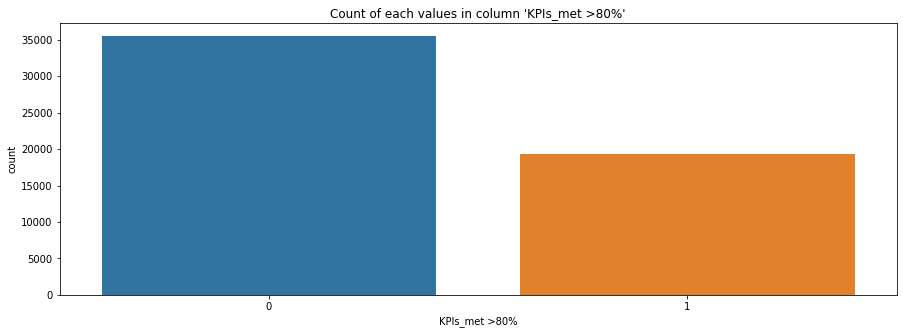

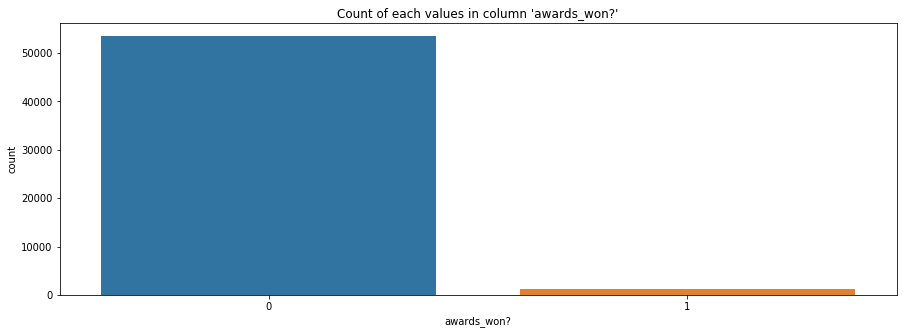

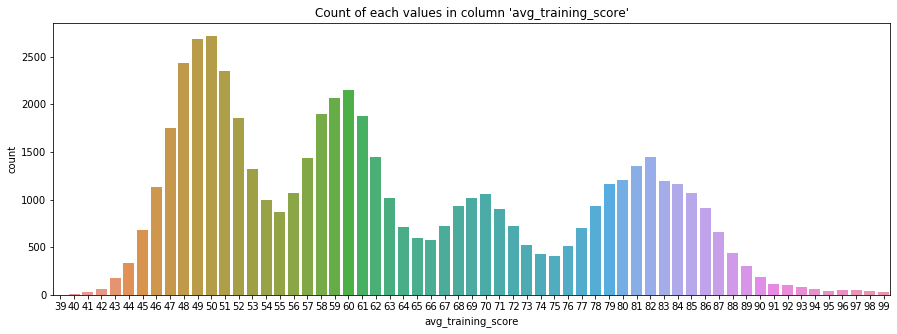

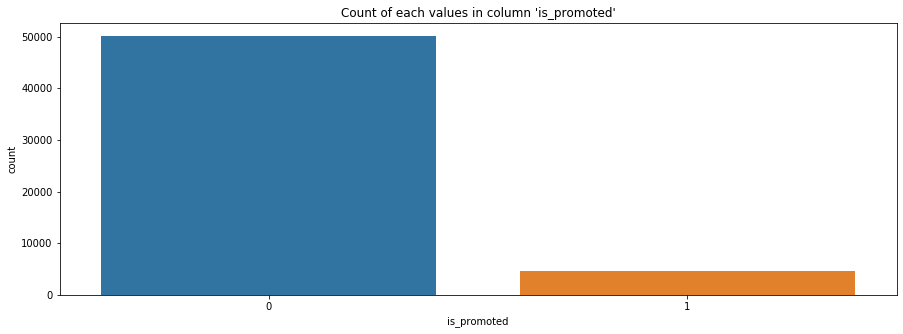

In [43]:
# Count of each values in column
for i in col_name:
    plt.figure(figsize=(15,5))
    plt.title("Count of each values in column '{}'".format(i))
    sns.countplot(df[i])
    plt.show()

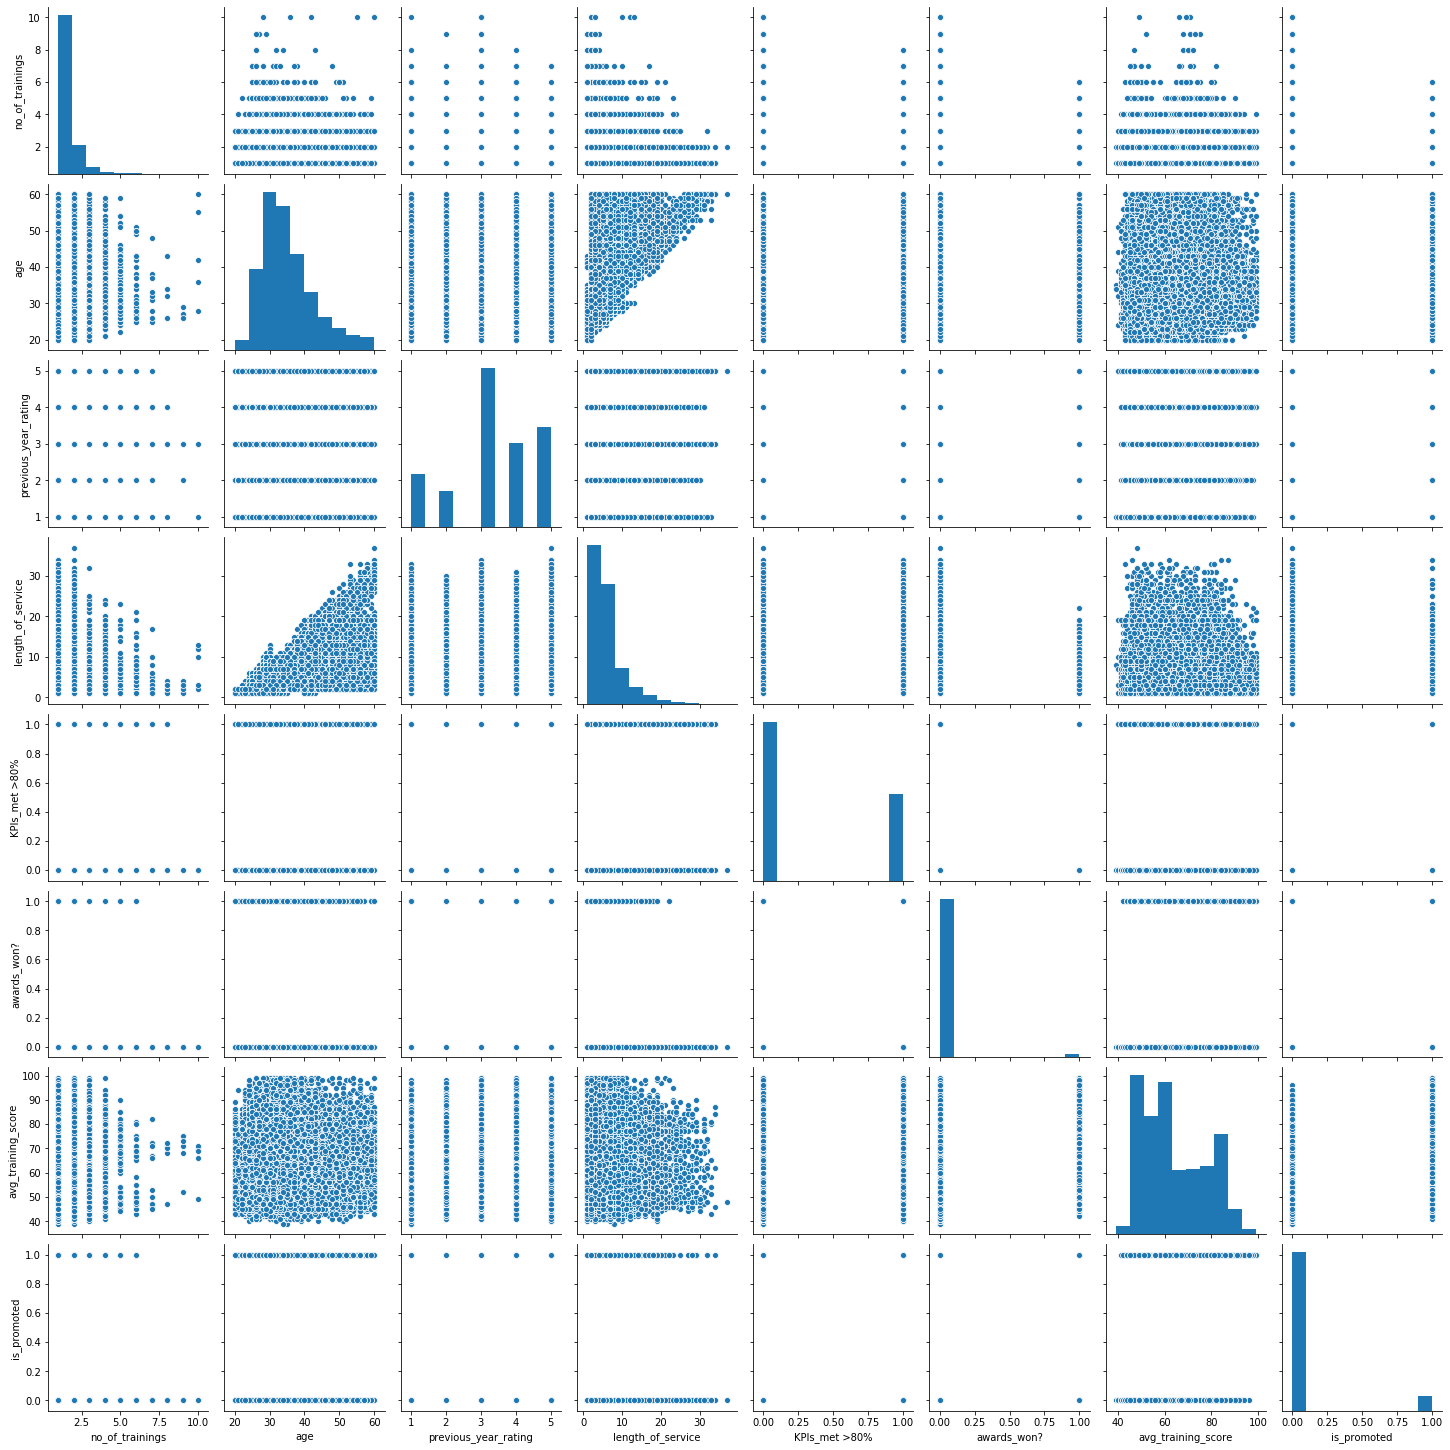

In [44]:
# Pair plot

sns.pairplot(df)
plt.show()

##### Finding missing values and imputing it:

In [45]:
print("There are totally {} missing values in the dataset.".format(df.isnull().sum().sum()))

There are totally 6533 missing values in the dataset.


In [46]:
# Count of missing values in column

for i in col_name:
    if df[i].isnull().sum() > 0:
        print("There are {} missing values in the '{}' column.\n".format(df[i].isnull().sum(),i))

There are 2409 missing values in the 'education' column.

There are 4124 missing values in the 'previous_year_rating' column.



In [47]:
# Imputing missing values in column education with forwardfill

df['education'] = df['education'].ffill()

In [54]:
# Value count for column "length_of_service" when "previous_year_rating" isnull

df[df["previous_year_rating"].isnull() ==True]['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

In [19]:
# Imputing missing values in column "previous_year_rating" with "0" as length of service is 1 for missing values 

df['previous_year_rating'] = df['previous_year_rating'].fillna(0.0)

### Featuring Engineering:

In [20]:
# Binning the age column

df['age'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49], 
                    labels=['20 to 30', '30 to 40', '40+']) 

In [21]:
# Changing datatype 'category' to 'object'

df['age'] = df['age'].astype('object')

### Spliting train data into Predictors(Independent) & Target(Dependent):

In [22]:
X = df.drop('is_promoted',axis=1)
y = df['is_promoted']

### Data encoding using OneHot encoding technique:

In [23]:
X_encode = pd.get_dummies(X,drop_first=True)

### Data scaling using RobustScalar:

In [24]:
from sklearn import preprocessing 

scaler = preprocessing.RobustScaler() 
X_standard = scaler.fit_transform(X_encode) 
X_standard = pd.DataFrame(X_standard, columns =X_encode.columns) 

### Not dividing train dataset to train_test_split as it gives less value of F-1 score.

### Creating Baseline ML Model for Binary Classification Problem:

In [25]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


Classifiers = {'0._XGBoost' : XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=5,subsample = 0.70,
                                            verbosity = 0, scale_pos_weight = 2.5,updater ="grow_histmaker",
                                            base_score  = 0.2),
               
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, n_estimators=500, subsample=0.085, max_depth=5,
                                                 scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, objective ="binary",importance_type = "gain",verbosity = -1,
                                             max_bin = 60,num_leaves = 300, boosting_type = 'dart',learning_rate=0.15, 
                                             n_estimators=500, max_depth=5, scale_pos_weight=2.5)}

- Parameters values are taken from tuning and trail and error method.

### Improving Model with Voting Classifier with MODEL Evaluation METRIC - "F1" and Predict Target "is_promoted":

In [26]:
from sklearn.ensemble import VotingClassifier

vc_model = VotingClassifier(estimators=[('XGBoost_Best', list(Classifiers.values())[0]), 
                                        ('CatBoost_Best', list(Classifiers.values())[1]),
                                        ('LightGBM_Best', list(Classifiers.values())[2]),
                                       ], 
                            voting='soft',weights=[2, 1, 3])

vc_model.fit(X_standard,y)

0:	learn: 0.5648352	total: 87.6ms	remaining: 43.7s
1:	learn: 0.4834916	total: 115ms	remaining: 28.6s
2:	learn: 0.4509473	total: 140ms	remaining: 23.2s
3:	learn: 0.4145220	total: 165ms	remaining: 20.4s
4:	learn: 0.3983708	total: 196ms	remaining: 19.4s
5:	learn: 0.3845350	total: 222ms	remaining: 18.3s
6:	learn: 0.3661135	total: 248ms	remaining: 17.4s
7:	learn: 0.3535865	total: 273ms	remaining: 16.8s
8:	learn: 0.3438405	total: 303ms	remaining: 16.5s
9:	learn: 0.3359034	total: 331ms	remaining: 16.2s
10:	learn: 0.3240534	total: 357ms	remaining: 15.8s
11:	learn: 0.3229018	total: 383ms	remaining: 15.6s
12:	learn: 0.3188154	total: 415ms	remaining: 15.5s
13:	learn: 0.3169403	total: 461ms	remaining: 16s
14:	learn: 0.3134755	total: 484ms	remaining: 15.7s
15:	learn: 0.3118684	total: 512ms	remaining: 15.5s
16:	learn: 0.3110453	total: 543ms	remaining: 15.4s
17:	learn: 0.3036552	total: 569ms	remaining: 15.2s
18:	learn: 0.2988185	total: 593ms	remaining: 15s
19:	learn: 0.2979615	total: 625ms	remaining:

163:	learn: 0.2483229	total: 4.52s	remaining: 9.25s
164:	learn: 0.2482596	total: 4.57s	remaining: 9.28s
165:	learn: 0.2481331	total: 4.64s	remaining: 9.33s
166:	learn: 0.2480125	total: 4.68s	remaining: 9.34s
167:	learn: 0.2479496	total: 4.72s	remaining: 9.34s
168:	learn: 0.2476997	total: 4.75s	remaining: 9.31s
169:	learn: 0.2476361	total: 4.82s	remaining: 9.35s
170:	learn: 0.2475053	total: 4.87s	remaining: 9.37s
171:	learn: 0.2474387	total: 4.91s	remaining: 9.37s
172:	learn: 0.2473798	total: 4.94s	remaining: 9.34s
173:	learn: 0.2472857	total: 4.97s	remaining: 9.31s
174:	learn: 0.2472015	total: 5s	remaining: 9.28s
175:	learn: 0.2471426	total: 5.02s	remaining: 9.25s
176:	learn: 0.2470912	total: 5.05s	remaining: 9.21s
177:	learn: 0.2470577	total: 5.08s	remaining: 9.2s
178:	learn: 0.2468927	total: 5.11s	remaining: 9.16s
179:	learn: 0.2468162	total: 5.16s	remaining: 9.17s
180:	learn: 0.2467919	total: 5.19s	remaining: 9.15s
181:	learn: 0.2467304	total: 5.22s	remaining: 9.12s
182:	learn: 0.24

322:	learn: 0.2351611	total: 9.42s	remaining: 5.16s
323:	learn: 0.2350942	total: 9.45s	remaining: 5.13s
324:	learn: 0.2350372	total: 9.47s	remaining: 5.1s
325:	learn: 0.2349945	total: 9.51s	remaining: 5.07s
326:	learn: 0.2349183	total: 9.54s	remaining: 5.04s
327:	learn: 0.2348244	total: 9.57s	remaining: 5.02s
328:	learn: 0.2347605	total: 9.59s	remaining: 4.99s
329:	learn: 0.2347052	total: 9.62s	remaining: 4.96s
330:	learn: 0.2346334	total: 9.65s	remaining: 4.93s
331:	learn: 0.2345072	total: 9.68s	remaining: 4.9s
332:	learn: 0.2344384	total: 9.71s	remaining: 4.87s
333:	learn: 0.2343702	total: 9.75s	remaining: 4.84s
334:	learn: 0.2343101	total: 9.78s	remaining: 4.82s
335:	learn: 0.2342548	total: 9.8s	remaining: 4.79s
336:	learn: 0.2342200	total: 9.83s	remaining: 4.75s
337:	learn: 0.2341554	total: 9.86s	remaining: 4.73s
338:	learn: 0.2341033	total: 9.89s	remaining: 4.7s
339:	learn: 0.2340379	total: 9.92s	remaining: 4.67s
340:	learn: 0.2339972	total: 9.95s	remaining: 4.64s
341:	learn: 0.23

484:	learn: 0.2261133	total: 14.2s	remaining: 439ms
485:	learn: 0.2260650	total: 14.2s	remaining: 410ms
486:	learn: 0.2259823	total: 14.3s	remaining: 381ms
487:	learn: 0.2259242	total: 14.3s	remaining: 352ms
488:	learn: 0.2259042	total: 14.3s	remaining: 322ms
489:	learn: 0.2258840	total: 14.4s	remaining: 293ms
490:	learn: 0.2258820	total: 14.4s	remaining: 264ms
491:	learn: 0.2258247	total: 14.4s	remaining: 235ms
492:	learn: 0.2257820	total: 14.5s	remaining: 205ms
493:	learn: 0.2256544	total: 14.5s	remaining: 177ms
494:	learn: 0.2255986	total: 14.6s	remaining: 147ms
495:	learn: 0.2254889	total: 14.6s	remaining: 118ms
496:	learn: 0.2254146	total: 14.6s	remaining: 88.3ms
497:	learn: 0.2253245	total: 14.7s	remaining: 58.9ms
498:	learn: 0.2252536	total: 14.7s	remaining: 29.5ms
499:	learn: 0.2252014	total: 14.7s	remaining: 0us


VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=0.2, max_depth=5,
                                            n_estimators=500,
                                            scale_pos_weight=2.5, subsample=0.7,
                                            updater='grow_histmaker',
                                            verbosity=0)),
                             ('CatBoost_Best',
                              <catboost.core.CatBoostClassifier object at 0x000001666B231648>),
                             ('LightGBM_Best',
                              LGBMClassifier(boosting_type='dart',
                                             importance_type='gain',
                                             learning_rate=0.15, max_bin=60,
                                             max_depth=5, n_estimators=500,
                                             num_leaves=300, objective='binary',
                                             scal

- Weights are taken from tuning.

## Scoring:

In [27]:
# Loading test dataset

df1 = pd.read_csv('test1.csv')
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [28]:
# Performing all the step on the unseen data that was performed on historical data

df2 = df1.copy()

df1.drop('employee_id',axis=1,inplace=True)

df1['education'] = df1['education'].ffill()

df1['previous_year_rating'] = df1['previous_year_rating'].fillna(0.0)

df1['age'] = pd.cut(x=df1['age'], bins=[20, 29, 39, 49], labels=['20 to 30', '30 to 40', '40+']) 
df1['age'] = df1['age'].astype('object')

df1_encode = pd.get_dummies(df1,drop_first=True)

scaler = preprocessing.RobustScaler() 
df_standard = scaler.fit_transform(df1_encode) 
df_standard = pd.DataFrame(df_standard, columns =df1_encode.columns)

### Predicting and storing the submission file:

In [29]:
df2['is_promoted'] = vc_model.predict(df_standard)

df1=df2[['employee_id','is_promoted']]
#df1.to_csv('Predict19.csv')